In [3]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer


In [12]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Save the model to your local directory (optional)
model.save_pretrained("./gpt2_model")
tokenizer.save_pretrained("./gpt2_tokenizer")


('./gpt2_tokenizer\\tokenizer_config.json',
 './gpt2_tokenizer\\special_tokens_map.json',
 './gpt2_tokenizer\\vocab.json',
 './gpt2_tokenizer\\merges.txt',
 './gpt2_tokenizer\\added_tokens.json')

In [13]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer from the saved directory
model = GPT2LMHeadModel.from_pretrained("D:/DUK/Generative_AI Storyteller/gpt2_model")
tokenizer = GPT2Tokenizer.from_pretrained("D:/DUK/Generative_AI Storyteller/gpt2_model")


In [17]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def generate_story(prompt, model, tokenizer, max_length=500):
    # Encode the input prompt and add batch dimension
    inputs = tokenizer.encode(prompt, return_tensors="pt")
    
    # Generate the story by continuing from the prompt
    outputs = model.generate(
        inputs,
        max_length=max_length,
        num_return_sequences=1,  # Generate only one story
        do_sample=True,  # Enable sampling
        no_repeat_ngram_size=2,  # Avoid repetition in n-grams
        temperature=0.7,  # Controls randomness of predictions
        top_p=0.9,  # Top-p (nucleus sampling) controls diversity
        top_k=50,  # Top-k sampling controls diversity
        pad_token_id=tokenizer.eos_token_id  # Ensures proper padding
    )
    
    # Decode the generated sequence
    story = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return story

# Example usage with your input prompt:
prompt = "Once upon a time, in a land far, far away, there was a kingdom ruled by a wise king."
generated_story = generate_story(prompt, model, tokenizer)
print(generated_story)


Once upon a time, in a land far, far away, there was a kingdom ruled by a wise king. The king was an old man of great renown, and he was known as the king of kings. He was very wise and well-mannered, having a high standard of conduct. His name was Ethelred. This was the name of his first son, Eadric.

Then the King of the Kings came to King Arthur, with the power of all the kingdoms of Britain. Eilidh and his army came, armed with spears, shields, swords, javelins, axes, spears of war, arrows, bows, staves, harpoons, darts, scimitars, daggers, clubs, lances, knives, stones, stone axes and jauts, a spear, an axe, staff, two stones and a piece of stone. There was also a king named Eirika, who was called Eithas, because of her name. She was great in wisdom, not only in her knowledge of magic, but also in the arts and wisdom of men. And Einha was King Eutharion, the wise King. It was said that Eidha had a great body and that he had made a body of silver, which was made of iron. A man call

In [22]:
def save_story_to_file(story, filename="generated_story.txt"):
    with open(filename, 'w') as file:
        file.write(story)
    print(f"Story saved to {filename}")

generated_story = generate_story(prompt, model, tokenizer)
save_story_to_file(generated_story)


Story saved to generated_story.txt


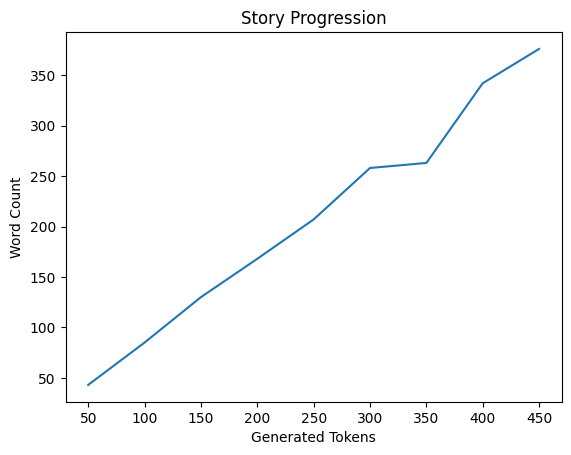

Final Story:
Once upon a time, in a land far, far away, there was a kingdom ruled by a wise king. And the king of kings is the son of a noble woman. He is a very good man. So he goes to a place where the land is very fertile, where he meets a great many people. The king is an excellent man, and he is also a king who is wise. But when the woman is born, he makes her a wife, to which she is given a daughter, a son, or a sister.

And he says to her, "I have seen your daughter and daughter-in-law, who, being a virgin, came to me from my country, while I was in my youth." And he adds, as a reminder, that there are many kings who are like him, but there is only one. In other words, one is like a man who has been raised from the dead, which is called a "born of the law."
. . .
 (1) The word is taken from "the law," which means "to act" in the common sense of that term. This is because it is used in connection with the "law of God." It is not a law of any kind, nor is it a rule of law. It simp

In [26]:
import matplotlib.pyplot as plt

def visualize_story_progression(prompt, model, tokenizer, max_length=500, step_size=50):
    story = ""
    word_count = []
    
    # Generate story in chunks and visualize progression
    for i in range(step_size, max_length, step_size):  # Generate story in steps
        partial_story = generate_story(prompt, model, tokenizer, max_length=i)
        story = partial_story
        word_count.append(len(story.split()))  # Count words in the generated story
    
    # Plot the word count progression
    plt.plot(range(step_size, max_length, step_size), word_count)
    plt.xlabel('Generated Tokens')
    plt.ylabel('Word Count')
    plt.title('Story Progression')
    plt.show()
    
    print("Final Story:")
    print(story)



In [27]:
def generate_story_with_limit(prompt, model, tokenizer, max_length=500, word_limit=100):
    story = generate_story(prompt, model, tokenizer, max_length)
    words = story.split()[:word_limit]  # Limit the story to a certain number of words
    return ' '.join(words)

